In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

### IMDB

In [2]:
path = 'syn_diffusion/imdb/'

In [3]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['color_val']] 
                        for node in G.nodes(data=True)], 
            node_size=100,
        font_color='white')
    plt.show() 

In [4]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [5]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Graph of 5 nodes

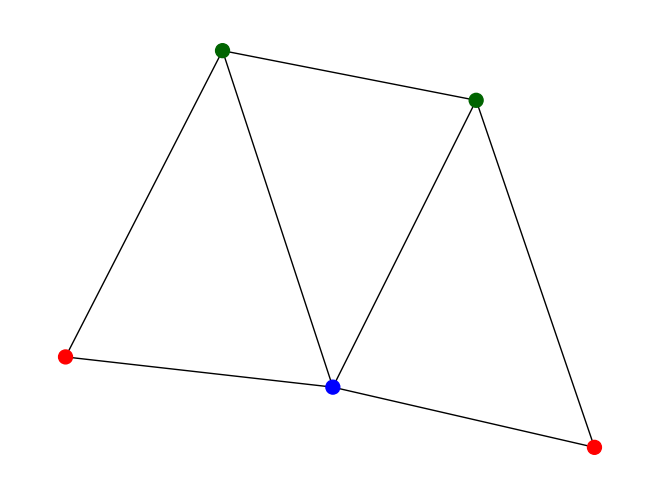

In [6]:
G5 = nx.read_gexf(path + 'graph_9.gexf')
plot_graph(G5)

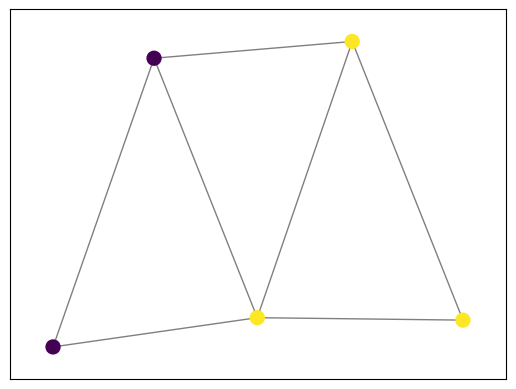

[{'2', '3'}, {'0', '1', '4'}]

In [7]:
detect_community(G5)
list_com= nx.community.louvain_communities(G5, seed=123)
list_com

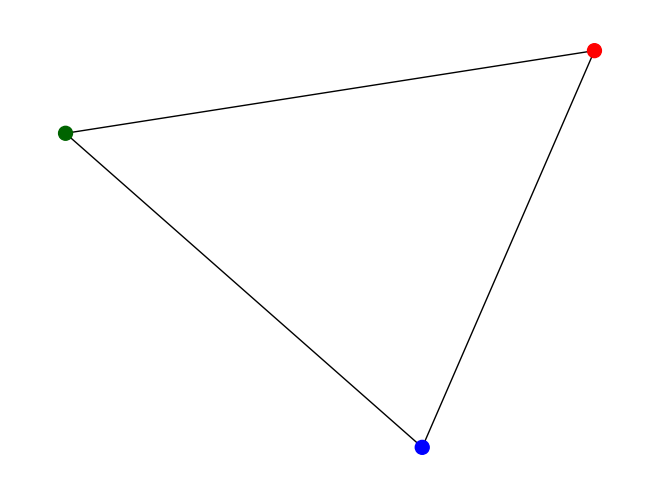

In [8]:
#Largest substructure
H = G5.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 10 nodes

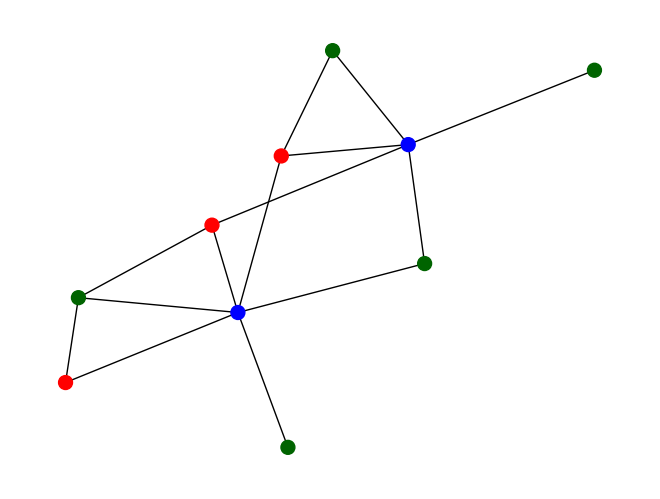

In [9]:
G10 = nx.read_gexf(path + 'graph_18.gexf')
plot_graph(G10)

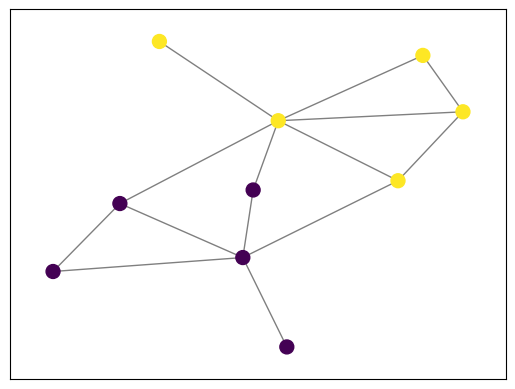

[{'0', '1', '6', '7', '8'}, {'2', '3', '4', '5', '9'}]

In [10]:
detect_community(G10)
list_com= nx.community.louvain_communities(G10, seed=123)
list_com

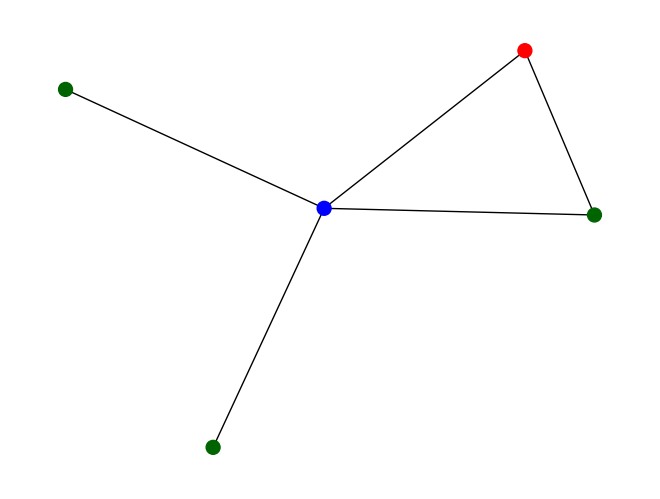

In [11]:
#Largest substructure
H = G10.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 15 nodes

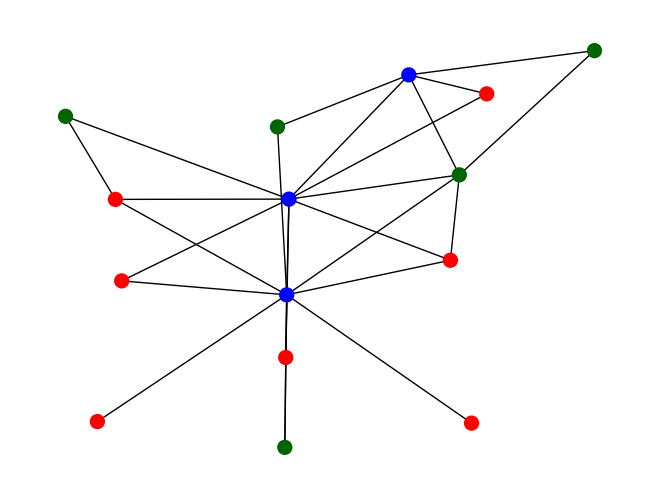

In [15]:
G15 = nx.read_gexf(path + 'graph_3.gexf')
plot_graph(G15)

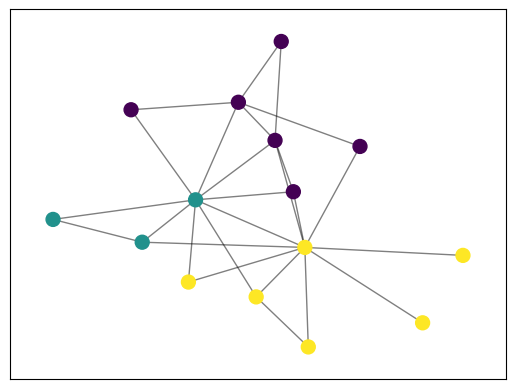

[{'1', '11', '3', '7', '9'},
 {'0', '10', '2', '4', '5'},
 {'12', '13', '14', '6', '8'}]

In [16]:
detect_community(G15)
list_com= nx.community.louvain_communities(G15, seed=123)
list_com

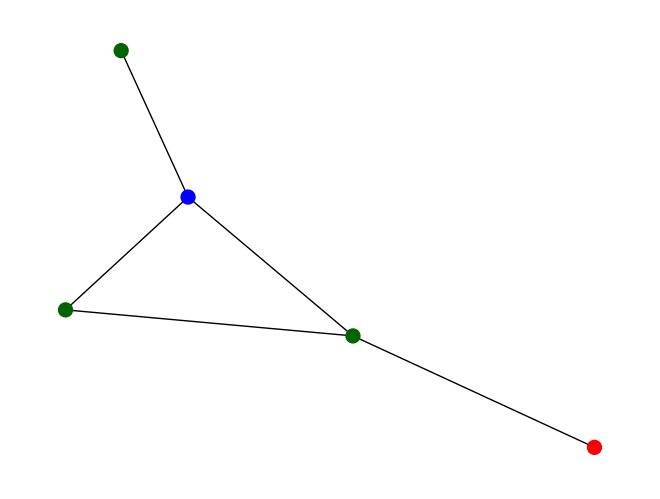

In [17]:
#Largest substructure
H = G15.subgraph(max(list_com, key=len))
plot_graph(H)